In [114]:
import rasterio
import numpy as np 
np.set_printoptions(suppress=True)
import pandas as pd

In [115]:
dataset = rasterio.open('MoBase_data_cube_21.tif')

In [116]:
## Print dataset attributes 
print('No of Bands:',dataset.count)
print('width:',dataset.width)
print('Height:',dataset.height)
print('CRS:',dataset.crs)
print('transform matrix:\n', dataset.transform)

No of Bands: 21
width: 94
Height: 111
CRS: EPSG:32643
transform matrix:
 | 2006.29, 0.00, 608032.02|
| 0.00,-2005.05, 1742972.89|
| 0.00, 0.00, 1.00|


In [117]:
## reading the data to an anrray
bandset = dataset.read()

In [118]:
## read csv using pandas 
point_loc = pd.read_csv('1k_CS01.csv', delimiter=',')
point_loc['X'][406]

714282.1209

In [119]:
ex_list = []
for i in range(point_loc.shape[0]):
    row, col = dataset.index(point_loc['X'][i], point_loc['Y'][i])
    z = bandset [:, row,col]
    ex_list.append(z)

In [120]:
ex_pd = pd.DataFrame(ex_list)
ex_pd.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
402,5.0,0.0,19697.714844,4000.0,95.0,143.0,3.042678,3.795864,19.060167,415.592407,...,132.681290,11.575275,67.623993,23.294394,3.791108,190.823456,1.434717,2.813392,3.037577,64.015678
403,5.0,0.0,13416.407227,0.0,103.0,219.0,1.783763,1.963969,22.073923,549.711548,...,91.314117,10.026456,80.896873,19.565626,3.540062,223.340622,1.796343,2.846106,2.081966,65.001129
404,5.0,0.0,17088.007812,2000.0,95.0,227.0,2.560841,2.449605,22.811216,648.575073,...,110.049637,10.365228,81.289413,32.462700,4.057668,225.110672,1.457089,3.361822,2.987663,62.672596
405,5.0,0.0,10000.000000,2000.0,203.0,191.0,3.619074,3.813882,41.115082,535.033264,...,146.453110,13.027774,83.814034,36.225243,4.907365,232.707108,1.176378,2.538024,3.520828,63.292385
406,1.0,0.0,5656.854004,0.0,159.0,207.0,2.803579,2.305210,28.607969,912.971558,...,101.698570,13.289539,99.952438,28.559862,5.544694,273.356873,1.470446,2.537972,2.910097,63.828625


In [121]:
columns_list = ['Geol','Dol_den', 'Lin_order1', 'Lin_order2', 'RTP', 'BGA', 'eK','eU','eTh', 'ZR','BA','RB','NB','CE','TH', 'U', 'TREE', 'MGO', 'CAO', 'K2O', 'SIO2',]

In [122]:
ex_pd.columns = columns_list

In [123]:
ex_pd.isna().sum()

Geol          0
Dol_den       0
Lin_order1    0
Lin_order2    0
RTP           0
BGA           0
eK            2
eU            2
eTh           2
ZR            0
BA            0
RB            0
NB            0
CE            0
TH            0
U             0
TREE          0
MGO           0
CAO           0
K2O           0
SIO2          0
dtype: int64

In [124]:
fill_pd = ex_pd.fillna(ex_pd.mean())
fill_pd.isna().sum()
fill_pd['Label'] = point_loc['Label']
fill_pd['CLUSTER_ID'] = point_loc['CLUSTER_ID']
fill_pd.to_csv('ext_1k_CS01.csv')

In [125]:
fill_pd

,Geol,Dol_den,Lin_order1,Lin_order2,RTP,BGA,eK,eU,eTh,ZR,...,CE,TH,U,TREE,MGO,CAO,K2O,SIO2,Label,CLUSTER_ID
0,2.0,21.753458,8944.272461,4000.000000,195.0,175.0,2.466003,2.005496,8.283116,400.021362,...,70.459976,12.168718,3.238506,191.476334,0.921928,2.202987,2.970477,62.076954,1,5
1,5.0,0.000000,4000.000000,2000.000000,191.0,63.0,1.087193,1.456824,8.475145,460.161957,...,56.712715,12.354337,1.907947,154.653488,1.802948,4.218361,1.204851,65.349281,1,0
2,5.0,0.000000,7211.102539,2000.000000,167.0,211.0,3.638682,5.112419,40.420933,1455.633789,...,107.265099,41.840858,4.400545,297.329132,2.089105,1.228896,0.925533,62.100338,1,3
3,5.0,69.865166,12649.110352,0.000000,227.0,143.0,1.781461,3.564141,18.578960,633.596802,...,69.823067,59.920433,7.381037,190.457458,1.202826,2.250504,3.130865,65.815964,1,0
4,2.0,0.000000,8246.210938,5656.854004,251.0,243.0,1.675960,1.138356,8.440859,424.076447,...,51.535969,8.711568,2.062654,154.586594,2.169107,5.281834,1.348414,58.054558,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,5.0,0.000000,19697.714844,4000.000000,95.0,143.0,3.042678,3.795864,19.060167,415.592407,...,67.623993,23.294394,3.791108,190.823456,1.434717,2.813392,3.037577,64.015678,0,4
403,5.0,0.000000,13416.407227,0.000000,103.0,219.0,1.783763,1.963969,22.073923,549.711548,...,80.896873,19.565626,3.540062,223.340622,1.796343,2.846106,2.081966,65.001129,0,4
404,5.0,0.000000,17088.007812,2000.000000,95.0,227.0,2.560841,2.449605,22.811216,648.575073,...,81.289413,32.462700,4.057668,225.110672,1.457089,3.361822,2.987663,62.672596,0,4
405,5.0,0.000000,10000.000000,2000.000000,203.0,191.0,3.619074,3.813882,41.115082,535.033264,...,83.814034,36.225243,4.907365,232.707108,1.176378,2.538024,3.520828,63.292385,0,4


In [126]:
## Reshape data cubeabs 
# ranspose to (height, width, bands)
data = np.transpose(bandset, (1, 2, 0))
# Step 2: Reshape to (pixels, bands)
table = data.reshape(-1, data.shape[2])
print("Reshaped table shape:", table.shape)  # should be (111*94, 21) = (10434, 21)

Reshaped table shape: (10434, 21)


In [127]:
# pd_table = pd.DataFrame(table)
# pd_table.columns = columns_list
# data_cube = pd_table.fillna(pd_table.mean())
# data_cube.to_csv('data_cube_ext.csv')

array([[<Axes: title={'center': 'Geol'}>,
        <Axes: title={'center': 'Dol_den'}>,
        <Axes: title={'center': 'Lin_order1'}>,
        <Axes: title={'center': 'Lin_order2'}>,
        <Axes: title={'center': 'RTP'}>],
       [<Axes: title={'center': 'BGA'}>, <Axes: title={'center': 'eK'}>,
        <Axes: title={'center': 'eU'}>, <Axes: title={'center': 'eTh'}>,
        <Axes: title={'center': 'ZR'}>],
       [<Axes: title={'center': 'BA'}>, <Axes: title={'center': 'RB'}>,
        <Axes: title={'center': 'NB'}>, <Axes: title={'center': 'CE'}>,
        <Axes: title={'center': 'TH'}>],
       [<Axes: title={'center': 'U'}>, <Axes: title={'center': 'TREE'}>,
        <Axes: title={'center': 'MGO'}>, <Axes: title={'center': 'CAO'}>,
        <Axes: title={'center': 'K2O'}>],
       [<Axes: title={'center': 'SIO2'}>,
        <Axes: title={'center': 'Label'}>,
        <Axes: title={'center': 'CLUSTER_ID'}>, <Axes: >, <Axes: >]],
      dtype=object)

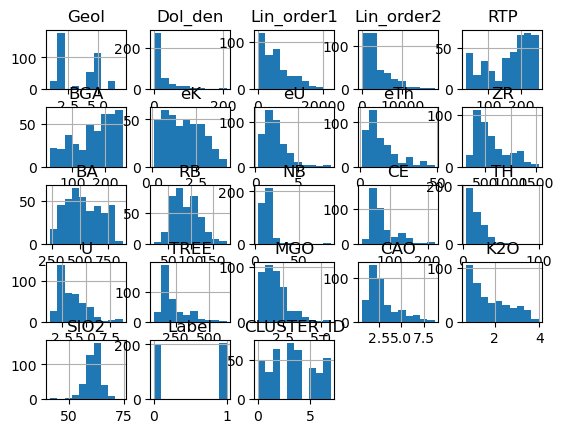

In [128]:
fill_pd.hist()

In [129]:
ex_list = []
for i in range(point_loc.shape[0]):
    row, col = dataset.index(point_loc['X'][i], point_loc['Y'][i])
    if (0 <= row < bandset.shape[1]) and (0 <= col < bandset.shape[2]):
        z = bandset[:, row, col]
        ex_list.append(z)
    else:
        print(f"Point {i} is out of bounds: row={row}, col={col}")
        ex_list.append(np.full(bandset.shape[0], np.nan))  # Or skip / fill with NaNs


In [130]:
point_loc.iloc[394,:]

X             7.636783e+05
Y             1.719758e+06
Label         0.000000e+00
CLUSTER_ID    0.000000e+00
Name: 394, dtype: float64